In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0
train_images = train_images.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
test_images = test_images.reshape(-1,28, 28, 1)

TypeError: ignored

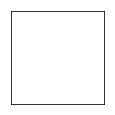

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 4, activation='relu',input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 4, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(126, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
model.fit(train_images, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 259us/sample - loss: 0.7405 - accuracy: 0.7283
Epoch 2/50
60000/60000 [==============================] - 15s 253us/sample - loss: 0.5334 - accuracy: 0.8023
Epoch 3/50
60000/60000 [==============================] - 15s 251us/sample - loss: 0.4848 - accuracy: 0.8198
Epoch 4/50
60000/60000 [==============================] - 15s 252us/sample - loss: 0.4543 - accuracy: 0.8312
Epoch 5/50
60000/60000 [==============================] - 15s 255us/sample - loss: 0.4314 - accuracy: 0.8392
Epoch 6/50
60000/60000 [==============================] - 15s 250us/sample - loss: 0.4146 - accuracy: 0.8454
Epoch 7/50
60000/60000 [==============================] - 15s 255us/sample - loss: 0.4019 - accuracy: 0.8500
Epoch 8/50
60000/60000 [==============================] - 15s 254us/sample - loss: 0.3929 - accuracy: 0.8533
Epoch 9/50
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3813 - accuracy: 0.8

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.3069 - accuracy: 0.8885

Test accuracy: 0.8885
